In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

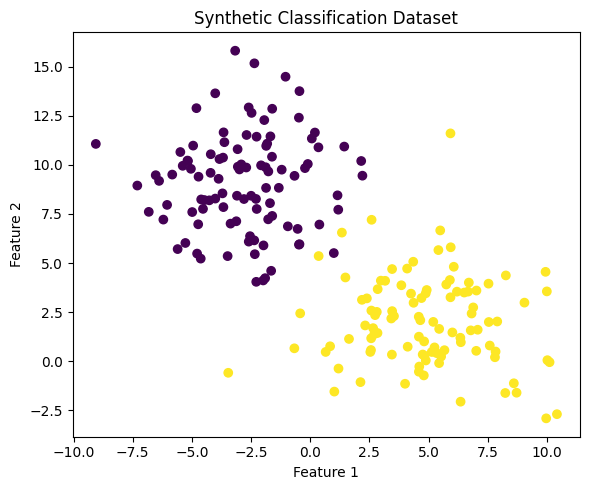

In [2]:
#Create Toy Dataset (2D Classification)
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200,centers=2,random_state=42,cluster_std=2.5)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Synthetic Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

In [3]:
#Gini Impurity Function
def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return 1 - np.sum(probs**2)

In [4]:
#Best Split Finder (Single Level Tree)
def best_split(X, y):
    best_gini = float("inf")
    best_feature = None
    best_threshold = None

    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])

        for t in thresholds:
            left = y[X[:, feature] <= t]
            right = y[X[:, feature] > t]

            if len(left) == 0 or len(right) == 0:
                continue

            gini = (
                len(left)/len(y) * gini_impurity(left) +
                len(right)/len(y) * gini_impurity(right)
            )

            if gini < best_gini:
                best_gini = gini
                best_feature = feature
                best_threshold = t

    return best_feature, best_threshold

In [5]:
#Compute Best Split
feature, threshold = best_split(X, y)
print("Best Feature:", feature)
print("Best Threshold:", threshold)

Best Feature: 0
Best Threshold: 0.3478594132348012


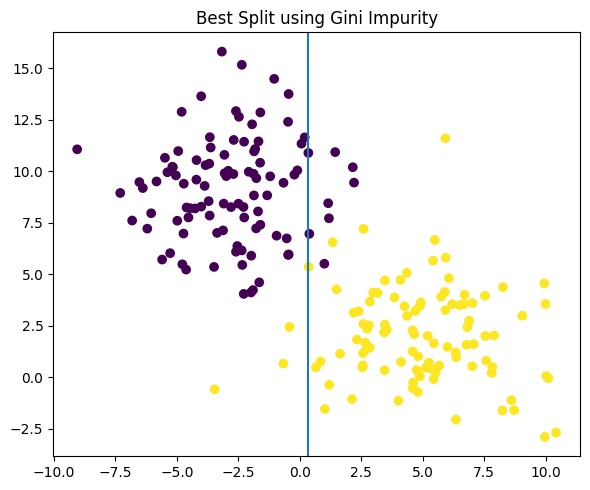

In [6]:
#Visualize Gini Split
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y)

if feature == 0:
    plt.axvline(threshold)
else:
    plt.axhline(threshold)

plt.title("Best Split using Gini Impurity")
plt.tight_layout()
plt.show()